In [17]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# 调度时间
#test是第i个工件在第j个机器加工完的时间
def dispatch(test,seq):
    N = test.shape[0]
    M = test.shape[1]
    result = np.zeros((N,M))
    for i in range(N):
        for j in range(M):
            if i == 0 and j == 0:
                result[i][j] = test[seq[i]][j]
            elif i==0:
                result[i][j] = result[i][j-1] + test[seq[i]][j]
            elif j==0:
                result[i][j] = result[i-1][j] + test[seq[i]][j]
            else:
                result[i][j] = max((result[i-1][j],result[i][j-1])) + test[seq[i]][j]
    return result[-1][-1]

In [19]:
#解码，将seq_weight解码为工件序列seq
def decode(seq_weight:list):
    lindex = [i for i in range(len(seq_weight))]
    index_seq_weight = list(zip(lindex,seq_weight))
    index_seq_weight.sort(key=lambda x:x[1])
    seq = [i[0] for i in index_seq_weight]
    return seq

In [20]:
#适应度
#x为一个个体
def f(test:np.array,x:np.array):
    y=decode(x)
    return 1/dispatch(test,y)

In [21]:
#编码,生成一个权重序列，该序列长度为n
def incode(n):
    return np.random.randint(0,n,n)

In [22]:
#初始化种群,N为种群个体数
#n为个体的项数
def population(N,n):
    return [incode(n) for i in range(N)]

In [23]:
#通过轮盘赌取一个种马
#popu_fun是待选择种群的适应度值
#popu_value是整个种群
def circle_bet(popu_value:list,popu_fun:list,popu_fun_sum:float):
    #popu_fun_prob是整个种群的适应度比例
    popu_fun_prob = [i/popu_fun_sum for i in popu_fun]
    #popu_fun_prob_cumu是适应度比例累计和
    popu_fun_prob_cumu = np.cumsum(popu_fun_prob)
    index = np.random.uniform(0,1)
    for i,prob in enumerate(popu_fun_prob_cumu):
        if index<prob: return popu_value[i]

In [24]:
#返回适应度列表和总适应度
#传进来一个种群
def funandsum(test:np.array,population:list):
    # popu_fun用来承接种群的适应度列表
    popu_fun = []
    for i in population:
        popu_fun.append(f(test,i))
    return popu_fun,sum(popu_fun)

In [25]:
#交叉
#参数为种群的两个个体,返回2个子代
import numpy as np
def mate(male:np.array,female:np.array):
    child1 = np.copy(male)
    child2 = np.copy(female)
    index1,index2 = np.random.randint(0,len(child1),2)
    if index1 > index2:
        index1,index2 = index2,index1
    child1[index1:index2]= female[index1:index2]
    child2[index1:index2]= male[index1:index2]
    return child1,child2

In [26]:
#变异
def change(x:np.array,prob:float):
    #单点变异
    new_x = np.copy(x)
    if np.random.rand()<=prob:
        index = np.random.randint(0,len(x))
        new_x[index] = np.random.randint(0,len(x))
    return new_x

In [27]:
#排序
#popu_value是整个种群
def sort_index(test:np.array,popu_value:list):
    #适应度值列表
    popu_fun = funandsum(test,popu_value)[0]
    one_zip = list(zip(popu_value,popu_fun))
    one_zip.sort(key=lambda x:x[1],reverse=True)
    result = [i[0] for i in one_zip]
    return result

In [28]:
#生成调度时间矩阵
random_array = np.random.randint(0,50,size=(3,3))
random_array

array([[31, 44, 14],
       [27, 31, 33],
       [15, 40, 17]])

In [29]:
#调度时间规模N,M
#种群中的个体个数individual
def envlution(N=10,M=10,individual=40,generation=500):
    #随机生成调度时间矩阵
    test = np.random.randint(0,100,size=(N,M))
    print('调度时间矩阵为：\n',test)
    #生成初始种群
    pop = population(individual,test.shape[0])
    result = []
    for i in range(generation):
        #交叉
            #轮盘赌选出两个个体
        fitness,fitness_sum = funandsum(test,pop)
        length = len(pop)
        for k in range(length//2):
            if np.random.rand()<0.8:
                goodone =  circle_bet(pop,fitness,fitness_sum)
                goodtwo =  circle_bet(pop,fitness,fitness_sum)
                child1,child2 = mate(goodone,goodtwo)
                pop.append(child1)
                pop.append(child2)
        #变异
        for k in range(len(pop)):
            pop[k]=change(x=pop[k],prob=0.05)
        pop = sort_index(test,pop)[0:length]
        #选择
        result.append(dispatch(test,decode(pop[0])))
    print('迭代次数：',generation,'   ','最短时间：',result[-1])
    return result

In [30]:
def line_picture(n,m):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    # 生成随机数据
    x = np.array(range(500))
    y = np.array(envlution(N=n,M=m,individual=40,generation=500))
    # 画折线图
    plt.plot(x, y, marker='o')  # 使用圆点标记
    plt.title('每一代最优个体')
    plt.xlabel('迭代次数')
    plt.ylabel('最短最大时间')
    plt.show()


调度时间矩阵为：
 [[80 83 41  1 70 53]
 [24 11 37 56 81 50]
 [52 61 41 43 75 55]
 [10 46 53 73  3 61]
 [37 92 56 71 38 92]
 [98 92 65 81 62 90]
 [50 26 22 56 68 80]
 [43 23  7 65 27  9]]


迭代次数： 500     最短时间： 723.0


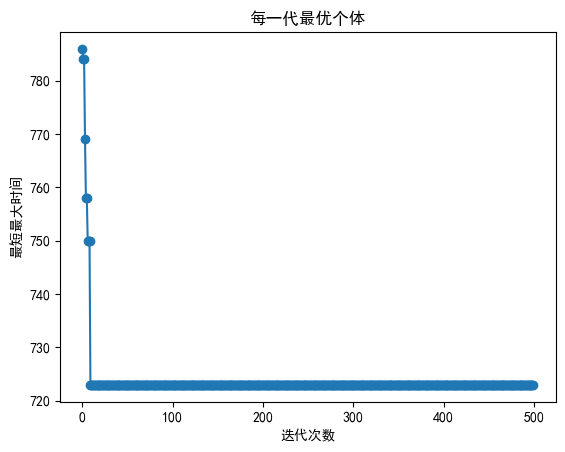

In [31]:
line_picture(8,6)

In [32]:
line_picture(n=12, m=10)

调度时间矩阵为：
 [[82 29 84  8 41  2 87 88 25 43]
 [16 63 26 79 90 35 23  8 58 83]
 [60 85 61 90 32 87 30 79 76 30]
 [ 5 34 55 34 96 32 63 91  7 38]
 [25 40 33 93 27 27 32 62 25 99]
 [67 77 18 95 79 25 92 88 29 20]
 [97 28 13 87  9 91 76 28 61 20]
 [43 36 13 23 24 42  2 55 58 47]
 [51 80 82  8 55  8 97 79 21  4]
 [ 4 70  4 79 37  4  3 43 49 99]
 [24  7 35 37 78 47 26 72 98 45]
 [ 4 40 18  5 61 15 45 84  4  3]]


KeyboardInterrupt: 

调度时间矩阵为：
 [[ 6  3 39 80 80  2]
 [83 69 38 19 42  5]
 [76 11 48 81 10 26]
 [ 8 72 77  0 35 77]
 [33 85 78  0 39 43]
 [14 45 64 51 99 33]
 [ 9 53 82 55 73 12]
 [42 47 86 10 19 87]
 [91 74 73 79 73  0]
 [ 1  8  7  6 42 43]
 [45 98 24 61 94 31]
 [77 23 28 25  3 59]
 [95 72 94 13 44 57]
 [ 7 14 60 76 75 35]
 [ 3 29 38 61 40  8]
 [89 94  2 27 35 25]
 [16 76 91 27 44  0]
 [ 5 44 41 50  3 94]
 [96 38 40 99 92 59]
 [56 39 23 14 50 63]]
迭代次数： 500     最短时间： 1142.0


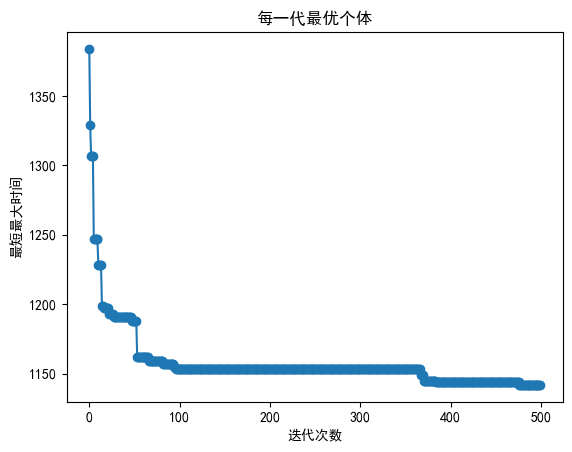

In [ ]:
line_picture(n=20, m=6)

调度时间矩阵为：
 [[71  5 87 48 78 31 20 39]
 [ 5  8 47  3 49 78 16 97]
 [13 76 58 14 54 44 68 46]
 [45 82 50 41 12 97 84 12]
 [62 32  9  8 69 77 28 52]
 [35 45 37 58 30 31 93 77]
 [37 22 21  1 47 79 91 99]
 [98 56 67 48 23 15 93 17]
 [71  8 20 75 13 28 50 46]
 [48 64 93 27 53 75 81 25]
 [26 86 58 39 14 99 37 77]
 [ 1 38 51 83 10  0 12 27]
 [64 45 91 79 19 48  0 93]
 [ 5 45 39 10 37 95 26 59]
 [57 10 57 65 21 62 87 81]
 [45 85 28 39 17 83 98 10]
 [ 5 93 54 47 72 57 72 57]
 [24 56  7 11 81 29 76 73]
 [33 89 45 33 76  5 94  3]
 [44 32 95 65 14 50 47 78]
 [72 37 41 18 17 89 99 59]
 [70 42 39 81 12 12 43 18]
 [36 56 15  8 97 87 53 38]
 [59 79 68 29 23 56 62 90]
 [24 25 83 33 76 49 76 99]]
迭代次数： 500     最短时间： 1725.0


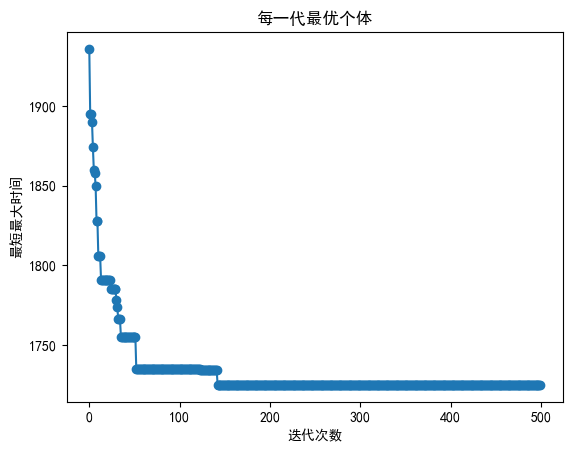

In [ ]:
line_picture(n=25, m=8)

调度时间矩阵为：
 [[16  7 75 39 90 69 34 12 58  0]
 [28 70 57 28 13 21 19 97 76 97]
 [68 68 35 71 55 44 15  1 57 50]
 [41 71 61 50 14 51 57 76 48 74]
 [20 15 92  5 26 19 19 75 81 17]
 [55 25 95 16 99 74 98 10 83 90]
 [72 41 27 90 28 76 28 44 71 82]
 [10 73 37 29 10 90 80 57 67 36]
 [36 15 82 59 70 82 68  8 77 33]
 [47 96 26 90 49 17 72  2 42 83]
 [44 12 52  5 50 12 88 38 62 15]
 [73 53 59 49 44 49 88 17 37 97]
 [43 33 74 83 14 22 49 60  7  1]
 [54  5 21  3 75 85 53 73 63 68]
 [78  5 19 98  9 90  6 43 42 94]
 [16 71 29 57 43 55 96 85 86 80]
 [69 64 97 27 43 44 34 69 15 53]
 [80 96 84 74 75 65 37 76 68 52]
 [85 19 33 94 48 15 72  9  6 48]
 [95 95 25 24 99 62 49 60 56 52]
 [57 70  2 16 77 39 15 31 22 19]
 [33 97 44 17 42 86 49 42 54 29]
 [87 67 82 57 18 40 84 79 43 73]
 [ 8  8 62 76 85  1 44 76 88 10]
 [51 99 74 49 66 31 17 93 83 35]
 [95 40 45 65 49 90 21 84 63 10]
 [93 27 19 76 64 22 59 67 45 95]
 [97 74 87 32 76 42 60  4 69 67]
 [38 93 54 77 16 21  2 32 30 70]
 [ 1 16 98 91 82 87 94 13 83 98]]

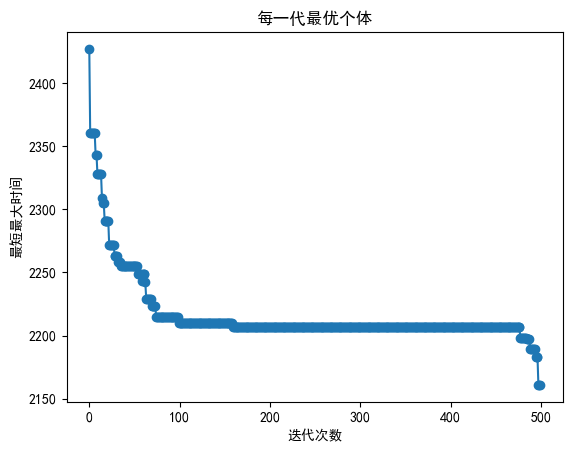

In [ ]:
line_picture(n=30, m=10)